## pandas 数据分析核心工具包
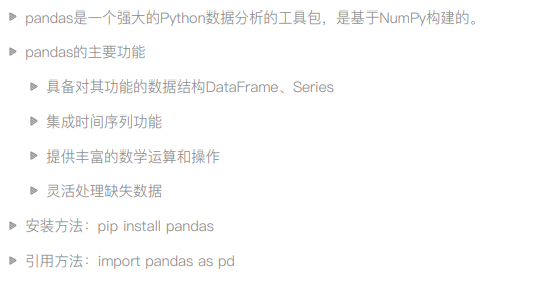

### 1. Series 一维数据对象
#### 1.1 创建

In [3]:
# 创建
import pandas as pd
pd.Series([2,3,4,5])

/home/tianhao/env4tiho_py36/lib/python3.6/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
Duplicate key in file PosixPath('/home/tianhao/env4tiho_py36/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc'), line 400 ('axes.unicode_minus: True  # use Unicode for the minus symbol rather than hyphen.  See')
/home/tianhao/env4tiho_py36/lib/python3.6/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


0    2
1    3
2    4
3    5
dtype: int64

In [6]:
sr = pd.Series([4,7,-5,4], index = ['a','b','c','d'])

In [7]:
sr.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [8]:
sr.values

array([ 4,  7, -5,  4])

#### 1.2 **整数索引**

In [3]:
import pandas as pd
import numpy as np

sr = pd.Series(np.arange(10))
sr

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64

Series有两种索引，分别为**标签**和**下标**，为了不冲突

使用`loc`属性将索引解释为标签，将`iloc`属性将索引解释为下标

In [4]:
sr.iloc[9]

9

#### 1.3 **数据对齐**

In [5]:
sr1 = pd.Series([12, 23, 34], index=['c','a','d'])
sr2 = pd.Series([11, 20, 10], index=['d','c','a'])

In [6]:
sr1 + sr2

a    33
c    32
d    45
dtype: int64

In [8]:
sr1 = pd.Series([12, 23, 34], index=['c','a','b'])
sr2 = pd.Series([11, 20, 10], index=['d','c','a'])
sr1 + sr2

a    33.0
b     NaN
c    32.0
d     NaN
dtype: float64

In [9]:
sr1.add(sr2)

a    33.0
b     NaN
c    32.0
d     NaN
dtype: float64

In [10]:
sr1.add(sr2, fill_value=0)

a    33.0
b    34.0
c    32.0
d    11.0
dtype: float64

#### 1.4 缺失值处理

In [13]:
sr = sr1 + sr2
sr

a    33.0
b     NaN
c    32.0
d     NaN
dtype: float64

In [14]:
sr.isnull()

a    False
b     True
c    False
d     True
dtype: bool

In [15]:
sr.notnull()

a     True
b    False
c     True
d    False
dtype: bool

In [16]:
sr[sr.notnull()]

a    33.0
c    32.0
dtype: float64

In [17]:
sr.dropna()

a    33.0
c    32.0
dtype: float64

In [18]:
sr.fillna(0)

a    33.0
b     0.0
c    32.0
d     0.0
dtype: float64

In [20]:
sr.fillna(sr.mean())

a    33.0
b    32.5
c    32.0
d    32.5
dtype: float64

### 2. DataFrame 二维数据对象
#### 2.1 创建

In [2]:
import pandas as pd
pd.DataFrame({'one':[1,2,3], 'two':[4,5,6]})

,one,two
0,1,4
1,2,5
2,3,6


In [8]:
# 从Series创建
df = pd.DataFrame({'one':pd.Series([1,2,3],index=['a','b','c']), 'two':pd.Series([1,2,3,4], index=['b','a','c','d'])})
df

,one,two
a,1.0,2
b,2.0,1
c,3.0,3
d,NaN,4


#### 2.2 常用属性

In [13]:
df

,one,two
a,1.0,2
b,2.0,1
c,3.0,3
d,NaN,4


In [9]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [10]:
df.values

array([[ 1.,  2.],
       [ 2.,  1.],
       [ 3.,  3.],
       [nan,  4.]])

In [11]:
df.T

,a,b,c,d
one,1.0,2.0,3.0,NaN
two,2.0,1.0,3.0,4.0


In [12]:
df.columns

Index(['one', 'two'], dtype='object')

In [14]:
df.describe() # 获取快速统计

,one,two
count,3.0,4.000000
mean,2.0,2.500000
std,1.0,1.290994
min,1.0,1.000000
25%,1.5,1.750000
50%,2.0,2.500000
75%,2.5,3.250000
max,3.0,4.000000


#### 2.3 索引和切片

In [15]:
df

,one,two
a,1.0,2
b,2.0,1
c,3.0,3
d,NaN,4


In [16]:
df['one']['a'] # 先列后行

1.0

In [17]:
df.loc['a', 'one']

1.0

In [18]:
df.loc['a', :]

one    1.0
two    2.0
Name: a, dtype: float64

#### 2.4 缺失数据

In [20]:
# 从Series创建
df = pd.DataFrame({'one':pd.Series([1,2,3],index=['a','b','c']), 'two':pd.Series([1,2,3,4], index=['b','a','c','d'])})
df

,one,two
a,1.0,2
b,2.0,1
c,3.0,3
d,NaN,4


In [22]:
import numpy as np
df.loc['c','two'] = np.nan
df.loc['d','two'] = np.nan
df

,one,two
a,1.0,2.0
b,2.0,1.0
c,3.0,NaN
d,NaN,NaN


In [23]:
df.dropna(how='all')

,one,two
a,1.0,2.0
b,2.0,1.0
c,3.0,NaN


In [24]:
df.dropna(how='any')

,one,two
a,1.0,2.0
b,2.0,1.0


In [25]:
df.dropna(axis= 1)

""
a
b
c
d


#### 2.5 pandas其他常用方法

In [27]:
df = pd.DataFrame({'one':pd.Series([5,6,7], index=['d','b','a']), 'two':pd.Series([1,2,3,4], index=['c','d','b','a'])})
df

,one,two
a,7.0,4
b,6.0,3
c,NaN,1
d,5.0,2


In [28]:
df.mean()

one    6.0
two    2.5
dtype: float64

In [29]:
df.mean(axis = 1)

a    5.5
b    4.5
c    1.0
d    3.5
dtype: float64

In [30]:
df.sum()

one    18.0
two    10.0
dtype: float64

In [31]:
# 按值排序
df.sort_values(by='two')

,one,two
c,NaN,1
d,5.0,2
b,6.0,3
a,7.0,4


In [32]:
df.sort_values(by='two', ascending=False)

,one,two
a,7.0,4
b,6.0,3
d,5.0,2
c,NaN,1


In [33]:
# 按照索引排序
df.sort_index(ascending=False)

,one,two
d,5.0,2
c,NaN,1
b,6.0,3
a,7.0,4


### 3 时间对象处理

In [1]:
# python标准库
import datetime
datetime.datetime.strptime('2010-01-01', '%Y-%m-%d')

datetime.datetime(2010, 1, 1, 0, 0)

In [2]:
import dateutil
dateutil.parser.parse('2010-01-01')

datetime.datetime(2010, 1, 1, 0, 0)

In [3]:
dateutil.parser.parse('2010/01/01')

datetime.datetime(2010, 1, 1, 0, 0)

---

In [5]:
import pandas as pd
# pandas将数据列表转换为时间序列
pd.to_datetime(['2001-01-01', '2010-Feb/02'])

/home/tianhao/env4tiho_py36/lib/python3.6/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
Duplicate key in file PosixPath('/home/tianhao/env4tiho_py36/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc'), line 400 ('axes.unicode_minus: True  # use Unicode for the minus symbol rather than hyphen.  See')
/home/tianhao/env4tiho_py36/lib/python3.6/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


DatetimeIndex(['2001-01-01', '2010-02-02'], dtype='datetime64[ns]', freq=None)

#### 3.1 时间对象生成 `pd.date_range()`

In [6]:
pd.date_range?

In [7]:
pd.date_range('2010-01-01','2010-5-1') # start, end

DatetimeIndex(['2010-01-01', '2010-01-02', '2010-01-03', '2010-01-04',
               '2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08',
               '2010-01-09', '2010-01-10',
               ...
               '2010-04-22', '2010-04-23', '2010-04-24', '2010-04-25',
               '2010-04-26', '2010-04-27', '2010-04-28', '2010-04-29',
               '2010-04-30', '2010-05-01'],
              dtype='datetime64[ns]', length=121, freq='D')

In [8]:
pd.date_range('2010-01-01', periods=60) # start, periods

DatetimeIndex(['2010-01-01', '2010-01-02', '2010-01-03', '2010-01-04',
               '2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08',
               '2010-01-09', '2010-01-10', '2010-01-11', '2010-01-12',
               '2010-01-13', '2010-01-14', '2010-01-15', '2010-01-16',
               '2010-01-17', '2010-01-18', '2010-01-19', '2010-01-20',
               '2010-01-21', '2010-01-22', '2010-01-23', '2010-01-24',
               '2010-01-25', '2010-01-26', '2010-01-27', '2010-01-28',
               '2010-01-29', '2010-01-30', '2010-01-31', '2010-02-01',
               '2010-02-02', '2010-02-03', '2010-02-04', '2010-02-05',
               '2010-02-06', '2010-02-07', '2010-02-08', '2010-02-09',
               '2010-02-10', '2010-02-11', '2010-02-12', '2010-02-13',
               '2010-02-14', '2010-02-15', '2010-02-16', '2010-02-17',
               '2010-02-18', '2010-02-19', '2010-02-20', '2010-02-21',
               '2010-02-22', '2010-02-23', '2010-02-24', '2010-02-25',
      

In [9]:
pd.date_range('2010-01-01',periods=60,freq='H')

DatetimeIndex(['2010-01-01 00:00:00', '2010-01-01 01:00:00',
               '2010-01-01 02:00:00', '2010-01-01 03:00:00',
               '2010-01-01 04:00:00', '2010-01-01 05:00:00',
               '2010-01-01 06:00:00', '2010-01-01 07:00:00',
               '2010-01-01 08:00:00', '2010-01-01 09:00:00',
               '2010-01-01 10:00:00', '2010-01-01 11:00:00',
               '2010-01-01 12:00:00', '2010-01-01 13:00:00',
               '2010-01-01 14:00:00', '2010-01-01 15:00:00',
               '2010-01-01 16:00:00', '2010-01-01 17:00:00',
               '2010-01-01 18:00:00', '2010-01-01 19:00:00',
               '2010-01-01 20:00:00', '2010-01-01 21:00:00',
               '2010-01-01 22:00:00', '2010-01-01 23:00:00',
               '2010-01-02 00:00:00', '2010-01-02 01:00:00',
               '2010-01-02 02:00:00', '2010-01-02 03:00:00',
               '2010-01-02 04:00:00', '2010-01-02 05:00:00',
               '2010-01-02 06:00:00', '2010-01-02 07:00:00',
               '2010-01-

In [10]:
pd.date_range('2010-01-01',periods=60,freq='W') # 每个周日

DatetimeIndex(['2010-01-03', '2010-01-10', '2010-01-17', '2010-01-24',
               '2010-01-31', '2010-02-07', '2010-02-14', '2010-02-21',
               '2010-02-28', '2010-03-07', '2010-03-14', '2010-03-21',
               '2010-03-28', '2010-04-04', '2010-04-11', '2010-04-18',
               '2010-04-25', '2010-05-02', '2010-05-09', '2010-05-16',
               '2010-05-23', '2010-05-30', '2010-06-06', '2010-06-13',
               '2010-06-20', '2010-06-27', '2010-07-04', '2010-07-11',
               '2010-07-18', '2010-07-25', '2010-08-01', '2010-08-08',
               '2010-08-15', '2010-08-22', '2010-08-29', '2010-09-05',
               '2010-09-12', '2010-09-19', '2010-09-26', '2010-10-03',
               '2010-10-10', '2010-10-17', '2010-10-24', '2010-10-31',
               '2010-11-07', '2010-11-14', '2010-11-21', '2010-11-28',
               '2010-12-05', '2010-12-12', '2010-12-19', '2010-12-26',
               '2011-01-02', '2011-01-09', '2011-01-16', '2011-01-23',
      

In [11]:
pd.date_range('2010-01-01',periods=60,freq='W-MON') # 每个周一

DatetimeIndex(['2010-01-04', '2010-01-11', '2010-01-18', '2010-01-25',
               '2010-02-01', '2010-02-08', '2010-02-15', '2010-02-22',
               '2010-03-01', '2010-03-08', '2010-03-15', '2010-03-22',
               '2010-03-29', '2010-04-05', '2010-04-12', '2010-04-19',
               '2010-04-26', '2010-05-03', '2010-05-10', '2010-05-17',
               '2010-05-24', '2010-05-31', '2010-06-07', '2010-06-14',
               '2010-06-21', '2010-06-28', '2010-07-05', '2010-07-12',
               '2010-07-19', '2010-07-26', '2010-08-02', '2010-08-09',
               '2010-08-16', '2010-08-23', '2010-08-30', '2010-09-06',
               '2010-09-13', '2010-09-20', '2010-09-27', '2010-10-04',
               '2010-10-11', '2010-10-18', '2010-10-25', '2010-11-01',
               '2010-11-08', '2010-11-15', '2010-11-22', '2010-11-29',
               '2010-12-06', '2010-12-13', '2010-12-20', '2010-12-27',
               '2011-01-03', '2011-01-10', '2011-01-17', '2011-01-24',
      

In [12]:
pd.date_range('2010-01-01',periods=60,freq='B') # 工作日

DatetimeIndex(['2010-01-01', '2010-01-04', '2010-01-05', '2010-01-06',
               '2010-01-07', '2010-01-08', '2010-01-11', '2010-01-12',
               '2010-01-13', '2010-01-14', '2010-01-15', '2010-01-18',
               '2010-01-19', '2010-01-20', '2010-01-21', '2010-01-22',
               '2010-01-25', '2010-01-26', '2010-01-27', '2010-01-28',
               '2010-01-29', '2010-02-01', '2010-02-02', '2010-02-03',
               '2010-02-04', '2010-02-05', '2010-02-08', '2010-02-09',
               '2010-02-10', '2010-02-11', '2010-02-12', '2010-02-15',
               '2010-02-16', '2010-02-17', '2010-02-18', '2010-02-19',
               '2010-02-22', '2010-02-23', '2010-02-24', '2010-02-25',
               '2010-02-26', '2010-03-01', '2010-03-02', '2010-03-03',
               '2010-03-04', '2010-03-05', '2010-03-08', '2010-03-09',
               '2010-03-10', '2010-03-11', '2010-03-12', '2010-03-15',
               '2010-03-16', '2010-03-17', '2010-03-18', '2010-03-19',
      

In [13]:
pd.date_range('2010-01-01',periods=60,freq='1h20min') # 1小时20分钟

DatetimeIndex(['2010-01-01 00:00:00', '2010-01-01 01:20:00',
               '2010-01-01 02:40:00', '2010-01-01 04:00:00',
               '2010-01-01 05:20:00', '2010-01-01 06:40:00',
               '2010-01-01 08:00:00', '2010-01-01 09:20:00',
               '2010-01-01 10:40:00', '2010-01-01 12:00:00',
               '2010-01-01 13:20:00', '2010-01-01 14:40:00',
               '2010-01-01 16:00:00', '2010-01-01 17:20:00',
               '2010-01-01 18:40:00', '2010-01-01 20:00:00',
               '2010-01-01 21:20:00', '2010-01-01 22:40:00',
               '2010-01-02 00:00:00', '2010-01-02 01:20:00',
               '2010-01-02 02:40:00', '2010-01-02 04:00:00',
               '2010-01-02 05:20:00', '2010-01-02 06:40:00',
               '2010-01-02 08:00:00', '2010-01-02 09:20:00',
               '2010-01-02 10:40:00', '2010-01-02 12:00:00',
               '2010-01-02 13:20:00', '2010-01-02 14:40:00',
               '2010-01-02 16:00:00', '2010-01-02 17:20:00',
               '2010-01-

#### 3.2 **时间序列**
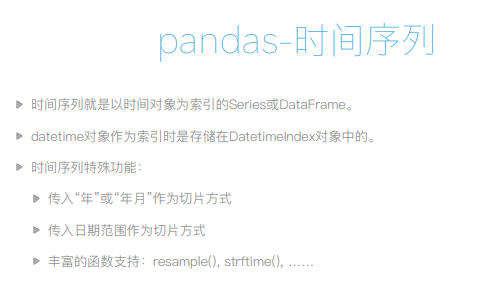

In [16]:
import numpy as np
sr = pd.Series(np.arange(100), index = pd.date_range('2017-01-01',periods=100))
sr

2017-01-01     0
2017-01-02     1
2017-01-03     2
2017-01-04     3
2017-01-05     4
              ..
2017-04-06    95
2017-04-07    96
2017-04-08    97
2017-04-09    98
2017-04-10    99
Freq: D, Length: 100, dtype: int64

In [17]:
sr.index

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-14', '2017-01-15', '2017-01-16',
               '2017-01-17', '2017-01-18', '2017-01-19', '2017-01-20',
               '2017-01-21', '2017-01-22', '2017-01-23', '2017-01-24',
               '2017-01-25', '2017-01-26', '2017-01-27', '2017-01-28',
               '2017-01-29', '2017-01-30', '2017-01-31', '2017-02-01',
               '2017-02-02', '2017-02-03', '2017-02-04', '2017-02-05',
               '2017-02-06', '2017-02-07', '2017-02-08', '2017-02-09',
               '2017-02-10', '2017-02-11', '2017-02-12', '2017-02-13',
               '2017-02-14', '2017-02-15', '2017-02-16', '2017-02-17',
               '2017-02-18', '2017-02-19', '2017-02-20', '2017-02-21',
               '2017-02-22', '2017-02-23', '2017-02-24', '2017-02-25',
      

选取17年3月的数据

In [52]:
sr['2017-03']

2017-03-01    59
2017-03-02    60
2017-03-03    61
2017-03-04    62
2017-03-05    63
2017-03-06    64
2017-03-07    65
2017-03-08    66
2017-03-09    67
2017-03-10    68
2017-03-11    69
2017-03-12    70
2017-03-13    71
2017-03-14    72
2017-03-15    73
2017-03-16    74
2017-03-17    75
2017-03-18    76
2017-03-19    77
2017-03-20    78
2017-03-21    79
2017-03-22    80
2017-03-23    81
2017-03-24    82
2017-03-25    83
2017-03-26    84
2017-03-27    85
2017-03-28    86
2017-03-29    87
2017-03-30    88
2017-03-31    89
Freq: D, dtype: int64

选取17年的数据

In [18]:
sr['2017']

2017-01-01     0
2017-01-02     1
2017-01-03     2
2017-01-04     3
2017-01-05     4
              ..
2017-04-06    95
2017-04-07    96
2017-04-08    97
2017-04-09    98
2017-04-10    99
Freq: D, Length: 100, dtype: int64

In [20]:
sr = pd.Series(np.arange(1000), index = pd.date_range('2017-01-01',periods=1000))
sr

2017-01-01      0
2017-01-02      1
2017-01-03      2
2017-01-04      3
2017-01-05      4
             ... 
2019-09-23    995
2019-09-24    996
2019-09-25    997
2019-09-26    998
2019-09-27    999
Freq: D, Length: 1000, dtype: int64

In [21]:
# 2017年到2018年3月的数据
sr['2017':'2018-03']

2017-01-01      0
2017-01-02      1
2017-01-03      2
2017-01-04      3
2017-01-05      4
             ... 
2018-03-27    450
2018-03-28    451
2018-03-29    452
2018-03-30    453
2018-03-31    454
Freq: D, Length: 455, dtype: int64

In [22]:
# resample()
sr.resample('W').sum()

2017-01-01       0
2017-01-08      28
2017-01-15      77
2017-01-22     126
2017-01-29     175
              ... 
2019-09-01    6790
2019-09-08    6839
2019-09-15    6888
2019-09-22    6937
2019-09-29    4985
Freq: W-SUN, Length: 144, dtype: int64

### 4. 文件读取
#### 4.1 文件读取
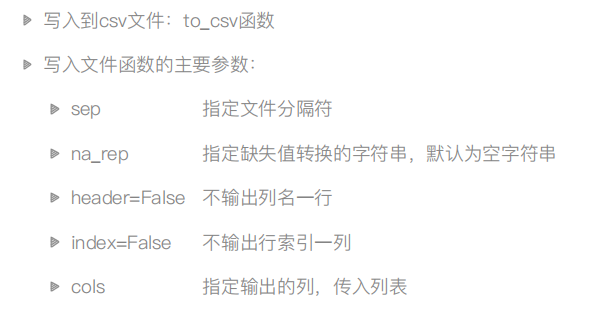

In [1]:
import pandas as pd
pd.read_csv('601318.csv')

/home/tianhao/env4tiho_py36/lib/python3.6/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
Duplicate key in file PosixPath('/home/tianhao/env4tiho_py36/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc'), line 400 ('axes.unicode_minus: True  # use Unicode for the minus symbol rather than hyphen.  See')
/home/tianhao/env4tiho_py36/lib/python3.6/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


,Unnamed: 0,date,open,close,high,low,volume,code
0,0,2007-03-01,21.878,20.473,22.302,20.040,1977633.51,601318
1,1,2007-03-02,20.565,20.307,20.758,20.075,425048.32,601318
2,2,2007-03-05,20.119,19.419,20.202,19.047,419196.74,601318
3,3,2007-03-06,19.253,19.800,20.128,19.143,297727.88,601318
4,4,2007-03-07,19.817,20.338,20.522,19.651,287463.78,601318
...,...,...,...,...,...,...,...,...
2558,2558,2017-12-11,71.200,73.250,73.310,70.820,1139927.00,601318
2559,2559,2017-12-12,73.250,71.210,73.560,71.170,777900.00,601318
2560,2560,2017-12-13,71.210,72.120,72.620,70.200,865117.00,601318
2561,2561,2017-12-14,72.120,71.010,72.160,70.600,676186.00,601318


In [2]:
# 指定某一列作为索引
pd.read_csv('601318.csv', index_col = 0)

,date,open,close,high,low,volume,code
0,2007-03-01,21.878,20.473,22.302,20.040,1977633.51,601318
1,2007-03-02,20.565,20.307,20.758,20.075,425048.32,601318
2,2007-03-05,20.119,19.419,20.202,19.047,419196.74,601318
3,2007-03-06,19.253,19.800,20.128,19.143,297727.88,601318
4,2007-03-07,19.817,20.338,20.522,19.651,287463.78,601318
...,...,...,...,...,...,...,...
2558,2017-12-11,71.200,73.250,73.310,70.820,1139927.00,601318
2559,2017-12-12,73.250,71.210,73.560,71.170,777900.00,601318
2560,2017-12-13,71.210,72.120,72.620,70.200,865117.00,601318
2561,2017-12-14,72.120,71.010,72.160,70.600,676186.00,601318


In [5]:
# 指定日期作为索引
df = pd.read_csv('601318.csv', index_col='date')
df

,Unnamed: 0,open,close,high,low,volume,code
date,,,,,,,
2007-03-01,0,21.878,20.473,22.302,20.040,1977633.51,601318
2007-03-02,1,20.565,20.307,20.758,20.075,425048.32,601318
2007-03-05,2,20.119,19.419,20.202,19.047,419196.74,601318
2007-03-06,3,19.253,19.800,20.128,19.143,297727.88,601318
2007-03-07,4,19.817,20.338,20.522,19.651,287463.78,601318
...,...,...,...,...,...,...,...
2017-12-11,2558,71.200,73.250,73.310,70.820,1139927.00,601318
2017-12-12,2559,73.250,71.210,73.560,71.170,777900.00,601318
2017-12-13,2560,71.210,72.120,72.620,70.200,865117.00,601318


In [6]:
df.index

Index(['2007-03-01', '2007-03-02', '2007-03-05', '2007-03-06', '2007-03-07',
       '2007-03-08', '2007-03-09', '2007-03-12', '2007-03-13', '2007-03-14',
       ...
       '2017-12-04', '2017-12-05', '2017-12-06', '2017-12-07', '2017-12-08',
       '2017-12-11', '2017-12-12', '2017-12-13', '2017-12-14', '2017-12-15'],
      dtype='object', name='date', length=2563)

In [7]:
# 将文件中的能转为日期的数据 转为datetime的数据形式
df = pd.read_csv('601318.csv', index_col = 'date', parse_dates=True)
# df = pd.read_csv('601318.csv', index_col = 'date', parse_dates=['date'])
df

,Unnamed: 0,open,close,high,low,volume,code
date,,,,,,,
2007-03-01,0,21.878,20.473,22.302,20.040,1977633.51,601318
2007-03-02,1,20.565,20.307,20.758,20.075,425048.32,601318
2007-03-05,2,20.119,19.419,20.202,19.047,419196.74,601318
2007-03-06,3,19.253,19.800,20.128,19.143,297727.88,601318
2007-03-07,4,19.817,20.338,20.522,19.651,287463.78,601318
...,...,...,...,...,...,...,...
2017-12-11,2558,71.200,73.250,73.310,70.820,1139927.00,601318
2017-12-12,2559,73.250,71.210,73.560,71.170,777900.00,601318
2017-12-13,2560,71.210,72.120,72.620,70.200,865117.00,601318


In [8]:
df.index

DatetimeIndex(['2007-03-01', '2007-03-02', '2007-03-05', '2007-03-06',
               '2007-03-07', '2007-03-08', '2007-03-09', '2007-03-12',
               '2007-03-13', '2007-03-14',
               ...
               '2017-12-04', '2017-12-05', '2017-12-06', '2017-12-07',
               '2017-12-08', '2017-12-11', '2017-12-12', '2017-12-13',
               '2017-12-14', '2017-12-15'],
              dtype='datetime64[ns]', name='date', length=2563, freq=None)

In [ ]:
# header 数据中没有列名
pd.read_csv('601318.csv', header=None, names=['col1', 'col2', 'col3',])

#### 文件处理
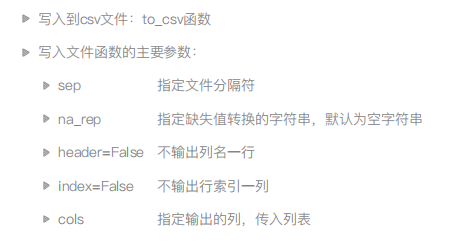

In [ ]:
df.to_csv('test.csv', header=False, na_rep='null', columns=[0,1,2,3])